In [1]:
#!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo 

import pandas as pd
import numpy as np
from pandas.plotting import andrews_curves
from pandas.plotting import parallel_coordinates
from pandas.plotting import radviz
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
sns.set(style="white", color_codes=True)

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [3]:
car_evaluation = fetch_ucirepo(id=19) 

In [5]:
dados = car_evaluation.data.original
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [37]:
X = pd.get_dummies(dados.drop('class', axis = 1))
y= dados['class']
X['class'] = y

In [39]:
X

,buying_high,buying_low,buying_med,buying_vhigh,maint_high,maint_low,maint_med,maint_vhigh,doors_2,doors_3,...,persons_2,persons_4,persons_more,lug_boot_big,lug_boot_med,lug_boot_small,safety_high,safety_low,safety_med,class
0,False,False,False,True,False,False,False,True,True,False,...,True,False,False,False,False,True,False,True,False,unacc
1,False,False,False,True,False,False,False,True,True,False,...,True,False,False,False,False,True,False,False,True,unacc
2,False,False,False,True,False,False,False,True,True,False,...,True,False,False,False,False,True,True,False,False,unacc
3,False,False,False,True,False,False,False,True,True,False,...,True,False,False,False,True,False,False,True,False,unacc
4,False,False,False,True,False,False,False,True,True,False,...,True,False,False,False,True,False,False,False,True,unacc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1723,False,True,False,False,False,True,False,False,False,False,...,False,False,True,False,True,False,False,False,True,good
1724,False,True,False,False,False,True,False,False,False,False,...,False,False,True,False,True,False,True,False,False,vgood
1725,False,True,False,False,False,True,False,False,False,False,...,False,False,True,True,False,False,False,True,False,unacc
1726,False,True,False,False,False,True,False,False,False,False,...,False,False,True,True,False,False,False,False,True,good


In [41]:
target_names = {
    'unacc':0,
    'acc':1, 
    'good':2,
    'vgood':3
}
 
X['target'] = X['class'].map(target_names)
X.drop('class', axis='columns', inplace=True)

In [43]:
X

,buying_high,buying_low,buying_med,buying_vhigh,maint_high,maint_low,maint_med,maint_vhigh,doors_2,doors_3,...,persons_2,persons_4,persons_more,lug_boot_big,lug_boot_med,lug_boot_small,safety_high,safety_low,safety_med,target
0,False,False,False,True,False,False,False,True,True,False,...,True,False,False,False,False,True,False,True,False,0
1,False,False,False,True,False,False,False,True,True,False,...,True,False,False,False,False,True,False,False,True,0
2,False,False,False,True,False,False,False,True,True,False,...,True,False,False,False,False,True,True,False,False,0
3,False,False,False,True,False,False,False,True,True,False,...,True,False,False,False,True,False,False,True,False,0
4,False,False,False,True,False,False,False,True,True,False,...,True,False,False,False,True,False,False,False,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1723,False,True,False,False,False,True,False,False,False,False,...,False,False,True,False,True,False,False,False,True,2
1724,False,True,False,False,False,True,False,False,False,False,...,False,False,True,False,True,False,True,False,False,3
1725,False,True,False,False,False,True,False,False,False,False,...,False,False,True,True,False,False,False,True,False,0
1726,False,True,False,False,False,True,False,False,False,False,...,False,False,True,True,False,False,False,False,True,2


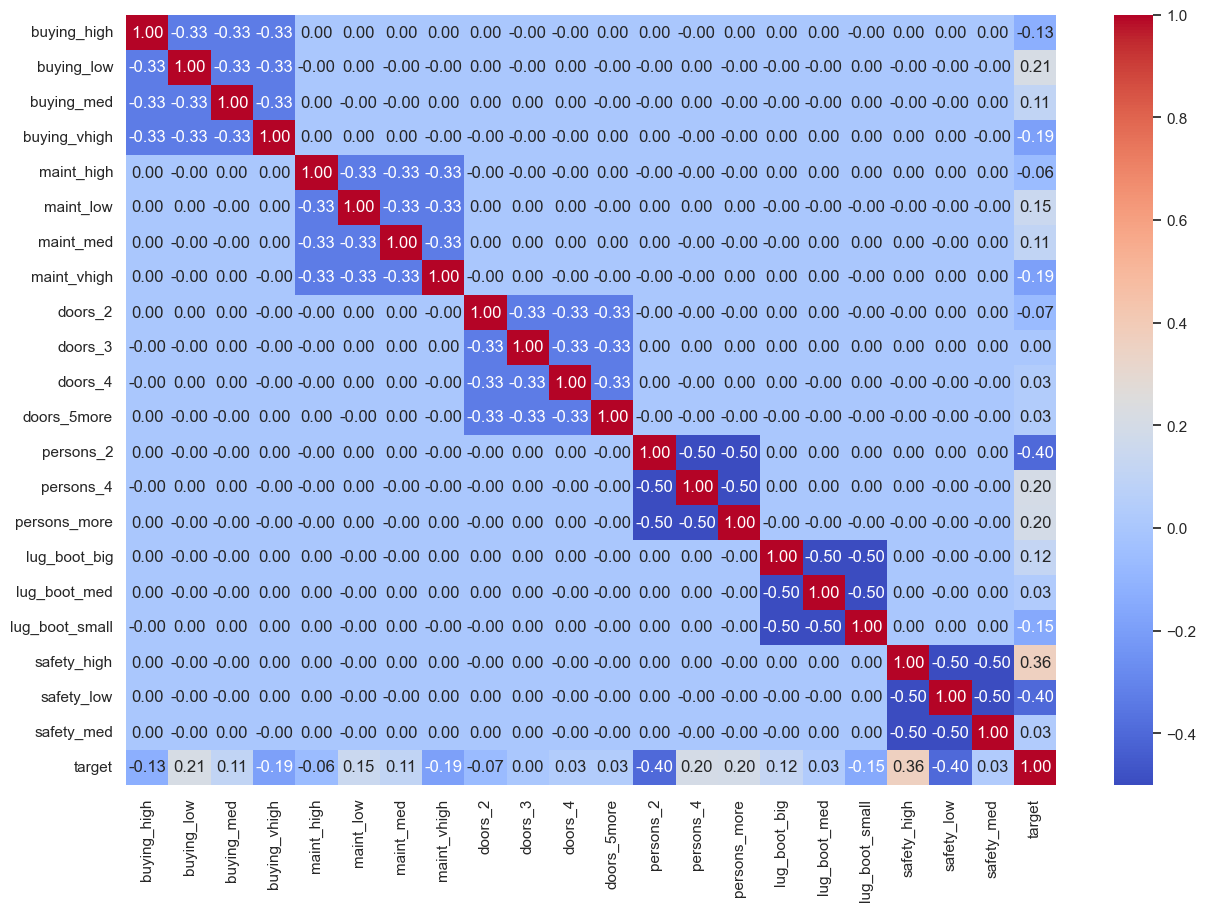

In [49]:
plt.figure(figsize=(15, 10))
sns.heatmap(X.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.show()